In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv 
import edgar
import os
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_MF = pd.read_csv(r'https://goz39a.s3.eu-central-1.amazonaws.com/13F/CIK_list.csv')
df_MF['Entity Name'] = df_MF['Entity Name']
#[i.find(isin(t)) for i in df_MF.loc[df_MF['Entity Name']]]
df_MF

,Unnamed: 0,CIK Number,Entity Name,Address_1,City,State,Zip Code
0,0,2110,COLUMBIA ACORN TRUST,227 W MONROE STE 3000,CHICAGO,IL,60606
1,1,2646,Voya INTERMEDIATE BOND PORTFOLIO,ING FUNDS SERVICES,SCOTTSDALE,AZ,85258
2,2,2663,VOYA GOVERNMENT MONEY MARKET PORTFOLIO,"7337 E. DOUBLETREE RANCH ROAD, STE 100",SCOTTSDALE,AZ,85258
3,3,2664,Voya VARIABLE FUNDS,"7337 E. DOUBLETREE RANCH ROAD, STE 100",SCOTTSDALE,AZ,85258
4,4,2691,LORD ABBETT AFFILIATED FUND INC,90 HUDSON STREET,JERSEY CITY,NJ,07302
...,...,...,...,...,...,...,...
2146,2146,1810747,Simplify Exchange Traded Funds,154 W 14TH ST,NEW YORK,NY,10011
2147,2147,1811168,2nd Vote Funds,PO BOX 2916,HENDERSONVILLE,TN,37077
2148,2148,1815558,Waycross Independent Trust,"C/O ULTIMUS FUND SOLUTIONS, LLC",CINCINNATI,OH,45246
2149,2149,1815608,Modern Capital Funds Trust,1050 JOHNNIE DODDS BLVD,MT. PLEASANT,SC,29465


In [3]:
df=pickle.load(open('C:/Users/ASUS/Desktop/df_All',"rb"))

In [4]:
df = df['quarter_0'] #select first quarter of 2020

In [5]:
df

2,filing index,date_reported,NAME OF ISSUER,TITLE OF CLASS,CUSIP,(x$1000),PRN AMT,PRN,CIK,Entity name
4,0001567619-20-002400,2020-02-07,ACTUANT CORP- A,COM,00508X203,103856,3989841,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
5,0001567619-20-002400,2020-02-07,AECOM,COM,00766T100,113169,2623898,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
6,0001567619-20-002400,2020-02-07,AES CORP,COM,00130H105,909,45692,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
7,0001567619-20-002400,2020-02-07,ALLSTATE CORP,COM,020002101,31883,283530,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
8,0001567619-20-002400,2020-02-07,AMDOCS LTD,COM,G02602103,949,13152,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
...,...,...,...,...,...,...,...,...,...,...
190,0000949509-20-000002,2020-02-14,WESTERN DIGITAL CORP,CONVERTIBLE BOND,958102AP0,8875,9016000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP
191,0000949509-20-000002,2020-02-14,WHITING PETROLEUM CORP,CONVERTIBLE BOND,966387AL6,5954,6069000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP
192,0000949509-20-000002,2020-02-14,YETI HOLDINGS INC,COMMON STOCK,98585X104,14533,417866,SH,949509,OAKTREE CAPITAL MANAGEMENT LP
193,0000949509-20-000002,2020-02-14,YPF SA,COMMON STOCK,984245100,15709,1356600,SH,949509,OAKTREE CAPITAL MANAGEMENT LP


In [6]:
# entity names as labels
labels = list(set(df['Entity name'].str.lower()))

In [7]:
labels

['conning inc. ',
 'oaktree capital management lp ',
 'alliancebernstein l.p. ',
 'banque pictet & cie sa ',
 'pictet & cie (europe) sa ',
 'pzena investment management llc ',
 'aegon usa investment management, llc ',
 'vanguard group inc ',
 'barings llc ',
 'ubs oconnor llc ',
 'invesco senior secured management inc /adv ',
 'pictet asset management ltd ',
 'transamerica financial advisors, inc. ',
 'vanguard capital wealth advisors ',
 'metlife investment management, llc ',
 'pictet bank & trust ltd ',
 'ubs asset management americas inc ',
 'ubs group ag ',
 'bank pictet & cie (asia) ltd ',
 'pictet north america advisors sa ',
 'invesco ltd. ']

In [8]:
def Adj_weight(df):
    dummies = pd.get_dummies(df['CUSIP']).astype(float)
    weights=dummies.T*np.asarray(df['(x$1000)']).astype(float)
    df_ = pd.concat([df[['CIK']],weights.T],axis=1)
    weights = df_.groupby(['CIK']).sum()
    v=np.dot(weights,weights.T)
    v=np.tril(v,0)
    return v

In [9]:
adj = Adj_weight(df)

In [10]:
adj.shape

(21, 21)

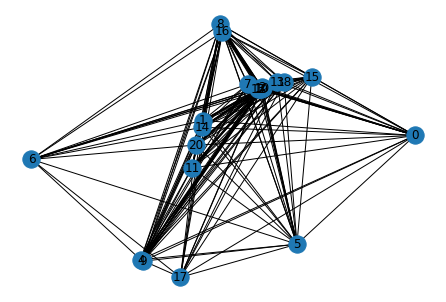

In [13]:
np.random.seed(3)
G = nx.from_numpy_matrix(adj)

#G=nx.relabel_nodes(G, labels)
pos= nx.draw_spring(G,with_labels=True)

plt.axis("off")
plt.show()

In [14]:
bb = nx.betweenness_centrality(G)
cc = nx.closeness_centrality(G)
dc = nx.degree_centrality(G)
centrality = {j:{'betweenness':bb[j],'closeness': cc[j],'degree': dc[j]} for i,j in enumerate(G.nodes)}
nx.set_node_attributes(G, centrality)



dict(sorted(bb.items(), key=lambda item: -item[1]))

{1: 0.005729066255382043,
 2: 0.005729066255382043,
 4: 0.005729066255382043,
 5: 0.005729066255382043,
 8: 0.005729066255382043,
 13: 0.005729066255382043,
 15: 0.005729066255382043,
 16: 0.005729066255382043,
 18: 0.005729066255382043,
 19: 0.005729066255382043,
 20: 0.00499807210333526,
 0: 0.003328834907782276,
 14: 0.002692629008418482,
 7: 0.002400231347599768,
 6: 0.0011358524516419254,
 17: 0.0003759398496240601,
 3: 0.0002923976608187134,
 9: 0.0002923976608187134,
 10: 0.0002923976608187134,
 11: 0.0002923976608187134,
 12: 0.0002923976608187134}

In [15]:
summary=pd.DataFrame({'betweenness':bb, 'closeness':cc, 'degree':dc}).reset_index()

In [16]:
summary

,index,betweenness,closeness,degree
0,0,0.003329,0.952381,1.05
1,1,0.005729,1.000000,1.10
2,2,0.005729,1.000000,1.10
3,3,0.000292,0.909091,1.00
4,4,0.005729,1.000000,1.10
5,5,0.005729,1.000000,1.10
6,6,0.001136,0.769231,0.80
7,7,0.002400,0.909091,1.00
8,8,0.005729,1.000000,1.10
9,9,0.000292,0.909091,1.00


community detection

In [17]:
import community

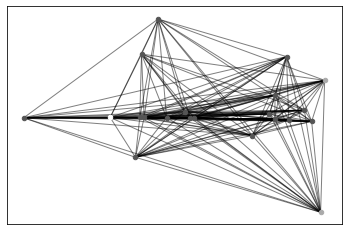

In [18]:
#louvain method if i understand correctly #from this website https://perso.crans.org/aynaud/communities/
#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [19]:
#another algorithm for community detection
def edge_to_remove(graph):
    G_dict=nx.edge_betweenness_centrality(graph)
    edge=()
    
    #extract the edge with the highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge=key
        break
    return edge

In [20]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [21]:
#find communities in the graph
c=girvan_newman(G.copy())
#find the nodes forming the communities
node_groups=[]

for i in c:
    node_groups.append(list(i))

In [22]:
node_groups

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20], [17]]

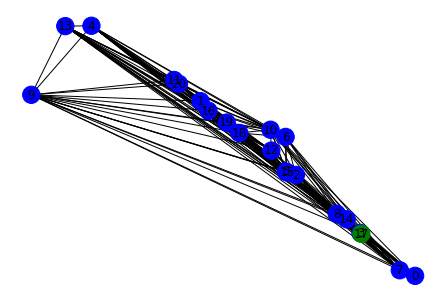

In [23]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [24]:
#another try, still louvain algorithm #from https://medium.com/analytics-vidhya/implement-louvain-community-detection-algorithm-using-python-and-gephi-with-visualization-871250fb2f25
import community as community_louvain
import matplotlib.cm as cm

In [25]:
# return partition as a dict
partition = community_louvain.best_partition(G)

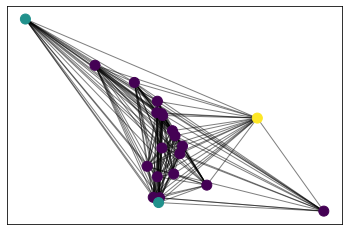

In [26]:
# visualization
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()